Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: ((0,0), (0,1), (1,1), (1,0)) — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля itertools и functools.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math
import numpy as np
import itertools
import functools as ft
from shapely.geometry import Polygon as ShapelyPolygon, Point
import math


Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib, см. пример: ссылка).

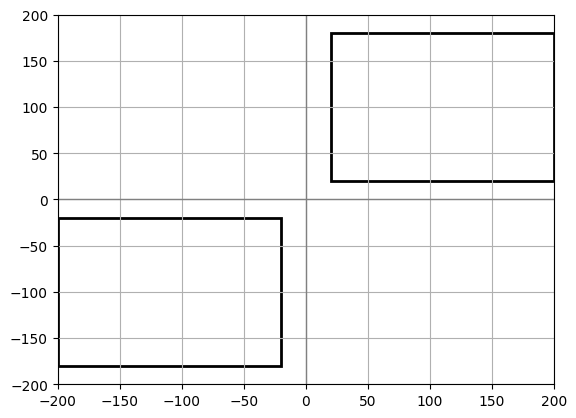

In [3]:
coordinats = [((20, 20), (200, 20), (200, 180), (20, 180)),((-20, -20), (-200, -20), (-200, -180), (-20, -180))]

def vizualize(coordinats, xlim=(-200, 200), ylim=(-200, 200)):
    itr = iter(coordinats)

    fig, ax = plt.subplots()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



    ax.axhline(y=0, color='gray', linewidth=1)
    ax.axvline(x=0, color='gray', linewidth=1)

    while True:
        try:
            poly_coords = next(itr)
            poly = Polygon(poly_coords, edgecolor='black', facecolor='none', linewidth=2)
            ax.add_patch(poly)

        except StopIteration:
            break

    plt.grid(True)
    plt.show()




vizualize(coordinats)

Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

прямоугольников (gen_rectangle);

треугольников (gen_triangle);

правильных шестиугольников (gen_hexagon).

с помощью данных функций используя функции из модуля itertools сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

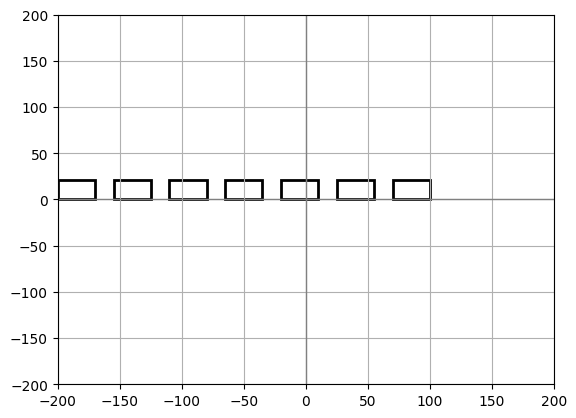

In [7]:
def gen_rectangle(start_x=1, start_y=1, width=30, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + width, start_y), (x + width, start_y + height), (x, start_y + height)]
        x += width + route
rectangles = itertools.islice(gen_rectangle(-200), 7)
vizualize(rectangles)


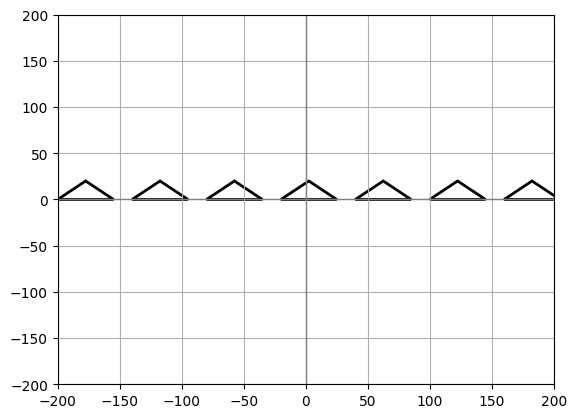

In [4]:
def gen_triangle(start_x=0, start_y=0, top=45, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + top / 2, start_y + height), (x + top, start_y)]
        x += top + route

triangles= itertools.islice(gen_triangle(-200), 7)
vizualize(triangles)

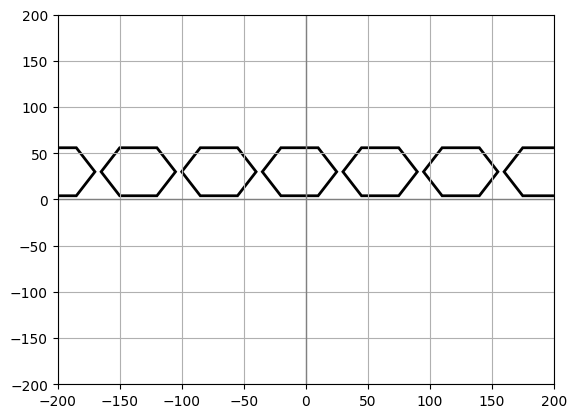

In [5]:
def gen_hexagon(start_x=0, start_y=30, side=30, route=5):
    while True:
        angles = np.linspace(0, 2*np.pi, 6, endpoint=False)
        hexagon = [(start_x + side * np.cos(angle), start_y + side * np.sin(angle)) for angle in angles]
        yield hexagon
        start_x += 2 * side + route



hexagons = itertools.islice(gen_hexagon(-200), 7)
vizualize(hexagons)

Реализовать операции:


параллельный перенос
 (tr_translate);

поворот (tr_rotate);

симметрия (tr_symmetry);

гомотетия (tr_homothety);

которые можно применить к последовательности полигонов с помощью функции map.


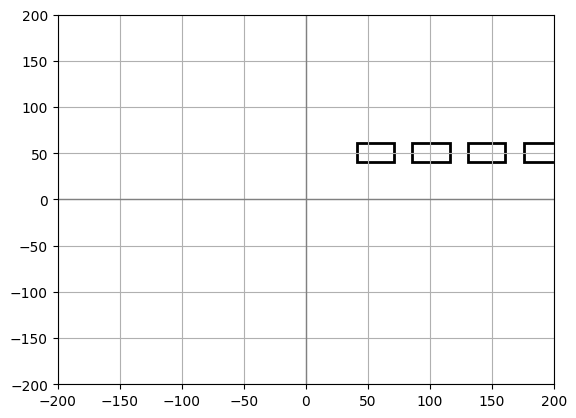

In [13]:
def tr_translate(dx, dy):
    def translate(poly):
        return [(x + dx, y + dy) for x, y in poly]
    return translate

rectangles = itertools.islice(gen_rectangle(), 7)
translated = map(tr_translate(40,40), rectangles)
vizualize(translated)

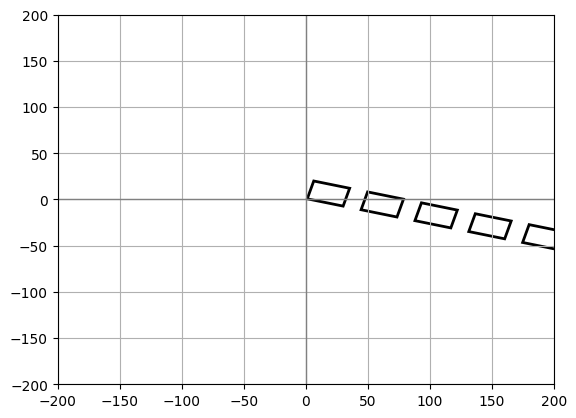

In [9]:
def tr_rotate(angle_rad):

    cos_a = math.cos(angle_rad)
    sin_a = math.sin(angle_rad)

    def rotate(poly):

        return [(x * cos_a - y * sin_a, x * sin_a + y * cos_a) for x, y in poly]
    return rotate


rectangles = itertools.islice(gen_rectangle(), 7)
angle_rad = math.radians(50)
rotated = map(tr_rotate(50), rectangles)


vizualize(rotated)

![Описание изображения](image/img.png)

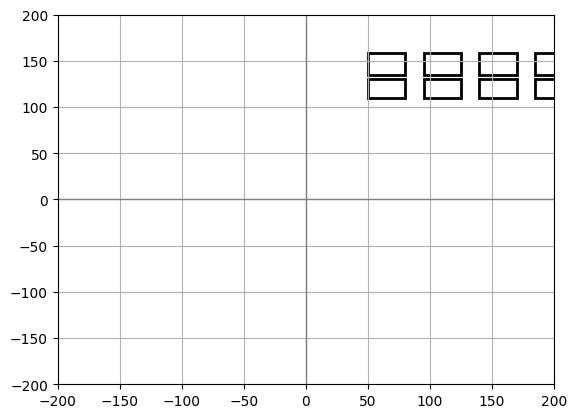

In [10]:
def to_symmetry(coordinates):

    symmetric_coords = [[(x, 1.2224*y) for x, y in polygon] for polygon in coordinates]
    return coordinates + symmetric_coords

rectangles = list(itertools.islice(gen_rectangle(start_x=50, start_y=110), 7))
all_rectangles = to_symmetry(rectangles)
vizualize(all_rectangles)

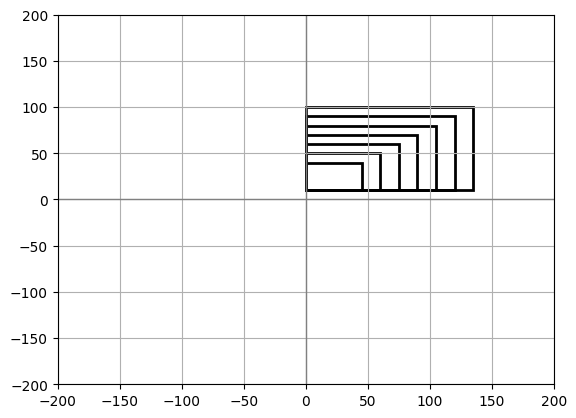

In [11]:
def tr_homothety(poly, k_start=1.0, k_step=0.1, max_steps=10, anchor_y=0):
    current_k = k_start
    for _ in range(max_steps):

        shifted = [(x, y - anchor_y) for x, y in poly]

        scaled = [(x * current_k, y * current_k) for x, y in shifted]

        transformed_poly = [(x, y + anchor_y) for x, y in scaled]
        yield transformed_poly
        current_k += k_step


rect_gen = gen_rectangle(start_x=0, start_y=10, height=20)
rect = next(rect_gen)
homo_gen = tr_homothety(rect, k_start=1.5, k_step=0.5, max_steps=10, anchor_y=10)
scaled_rects = list(itertools.islice(homo_gen, 7))
vizualize(scaled_rects)

С помощью данных функций создать и визуализировать (рис. 3):
три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

две параллельных ленты треугольников, ориентированных симметрично друг к другу;

последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

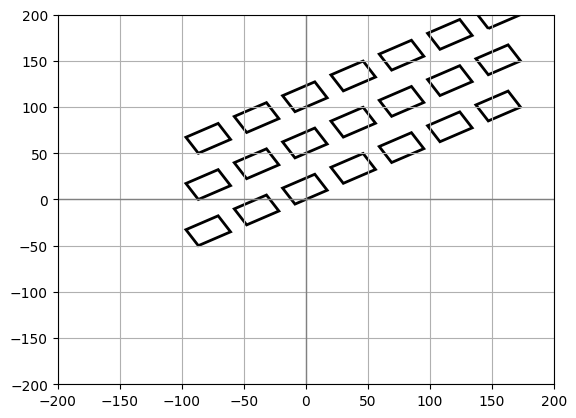

In [14]:
rectangles1 = list(itertools.islice(gen_rectangle(start_x=-100, start_y=0), 7))
angle_rad = math.radians(30)
rotated1 = list(map(tr_rotate(angle_rad), rectangles1))
translated2 = list(map(tr_translate(0, 50), rotated1))
translated3 = list(map(tr_translate(0, 100), rotated1))
all_polygons = rotated1 + translated2 + translated3
vizualize(all_polygons)

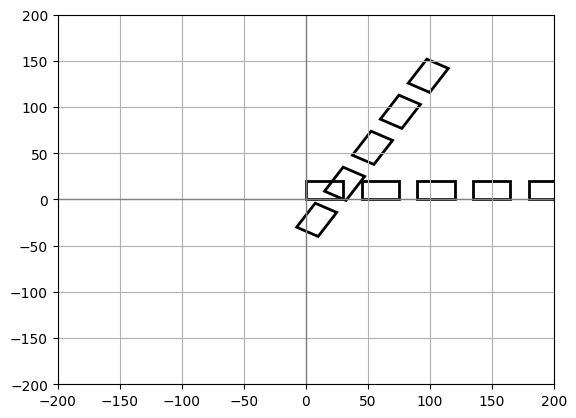

In [13]:

horizontal = list(itertools.islice(gen_rectangle(start_x=0, start_y=0), 5))


angled = list(itertools.islice(gen_rectangle(start_x=0, start_y=0), 5))
angled_rotated = list(map(tr_rotate(math.radians(60)), angled))
angled_shifted = list(map(tr_translate(10, -40), angled_rotated))


vizualize(horizontal + angled_shifted)


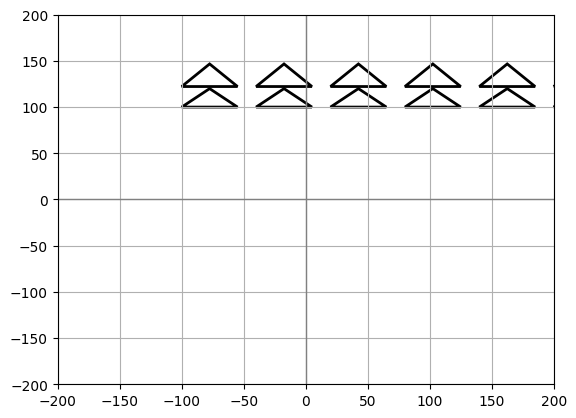

In [21]:
triangles1 = list(itertools.islice(gen_triangle(start_x=-100, start_y=100), 7))
all_triangles = to_symmetry(triangles1)
vizualize(all_triangles)


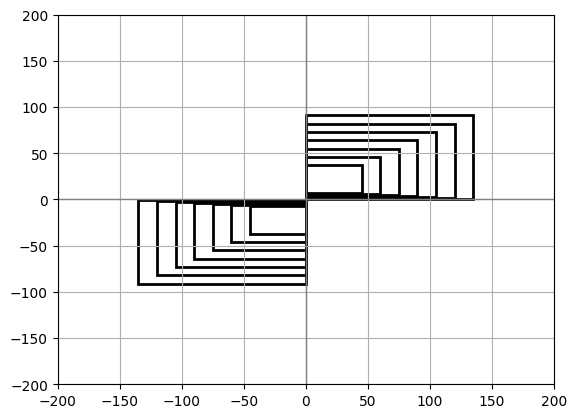

In [15]:
rect_gen = gen_rectangle(start_x=0, start_y=8, height=20)
rect = next(rect_gen)
homo_gen = tr_homothety(rect, k_start=1.5, k_step=0.5, max_steps=10, anchor_y=10)
scaled_rects = list(itertools.islice(homo_gen, 7))
rotated_rects =  list(map(tr_rotate(math.radians(180)), scaled_rects))
all2 = scaled_rects + rotated_rects
vizualize(all2)

фильтрации фигур, являющихся выпуклыми многоугольниками (flt_convex_polygon);

фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (flt_angle_point);

фильтрации фигур, имеющих площадь меньше заданной (flt_square);

фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (flt_short_side);

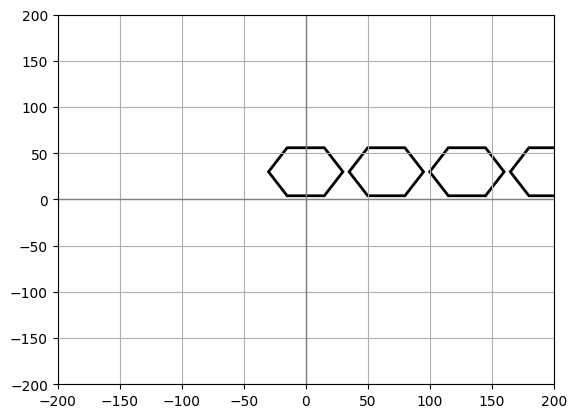

In [33]:
from shapely.geometry import Polygon as ShapelyPolygon
import itertools

def flt_convex_polygon(poly):
    polygon = ShapelyPolygon(poly)
    return polygon.equals(polygon.convex_hull)

hexagons = itertools.islice(gen_hexagon(), 7)
convex_hexagons = filter(flt_convex_polygon, hexagons)

vizualize(convex_hexagons)

In [34]:

polygons = [
    [(0, 0), (2, 0), (1, 2)],
    [(0, 0), (2, 0), (2, 2), (1, 1), (0, 2)]
]

convex_polygons = list(filter(flt_convex_polygon, polygons))
print("Оставшиеся (выпуклые) полигоны:", convex_polygons)


Оставшиеся (выпуклые) полигоны: [[(0, 0), (2, 0), (1, 2)]]


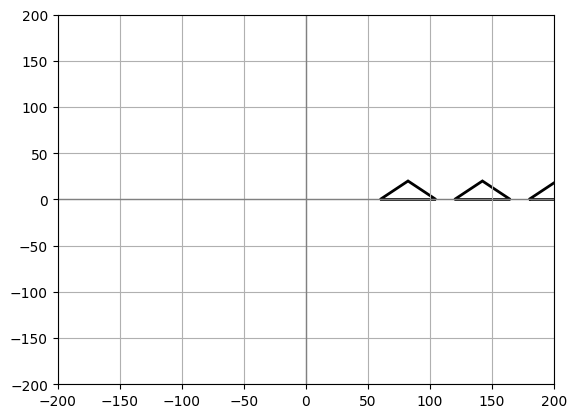

In [30]:
def flt_angle_point(angle=(0, 0)):
    def checker(coordinates):
        for point in coordinates:
            if point == angle:
                return False
        return True
    return checker


angle_checker = flt_angle_point((0, 0))
filtered = filter(angle_checker, gen_triangle())
vizualize(itertools.islice(filtered, 7))


[400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0]


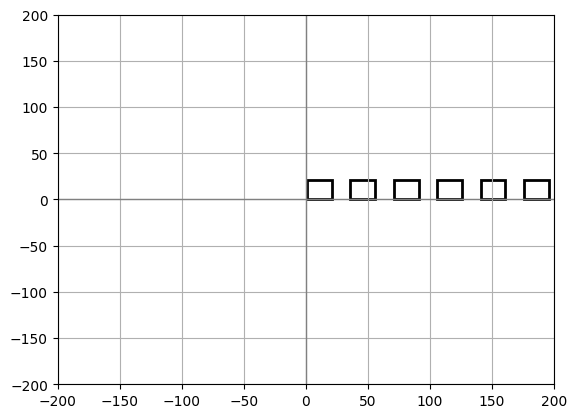

In [29]:
def flt_square(min_area=100):
    def checker(poly):
        return ShapelyPolygon(poly).area > min_area
    return checker

area_checker = flt_square(100)
filtered = list(itertools.islice(filter(area_checker, gen_rectangle(width=20, height=20)), 7))
print([ShapelyPolygon(poly).area for poly in filtered])
vizualize(filtered)


In [21]:
def tr_rotate(angle_rad):
    def my_decor(func):
        def wrapper(*args, **kwargs):
            cos_a = math.cos(angle_rad)
            sin_a = math.sin(angle_rad)
            gen = func(*args, **kwargs)
            for poly in gen:
                rotated_poly = [(x * cos_a - y * sin_a, x * sin_a + y * cos_a) for x, y in poly]
                yield rotated_poly
        return wrapper
    return my_decor


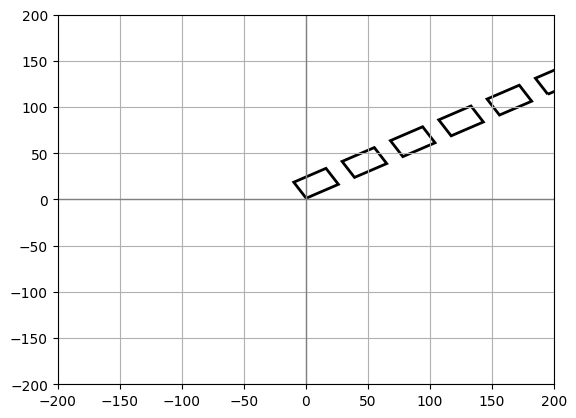

In [22]:
@tr_rotate(angle_rad=math.radians(30))
def gen_rectangle(start_x=1, start_y=1, width=30, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + width, start_y), (x + width, start_y + height), (x, start_y + height)]
        x += width + route

rectangles = itertools.islice(gen_rectangle(), 7)
vizualize(rectangles)


In [24]:
def tr_translate(dx, dy):
    def my_decor(func):
        def wrapper(*args, **kwargs):
            gen = func(*args, **kwargs)
            for poly in gen:
                translated_poly = [(x + dx, y + dy) for x, y in poly]
                yield translated_poly
        return wrapper
    return my_decor


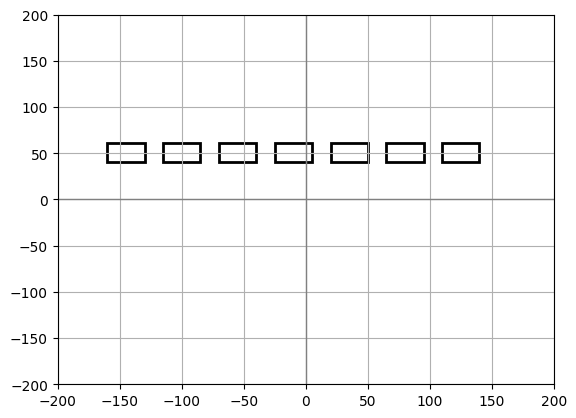

In [25]:
@tr_translate(40, 40)
def gen_rectangle(start_x=1, start_y=1, width=30, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + width, start_y), (x + width, start_y + height), (x, start_y + height)]
        x += width + route

rectangles = itertools.islice(gen_rectangle(-200), 7)
vizualize(rectangles)

In [26]:
def tr_homothety(k_start=1.0, k_step=0.1, max_steps=10, anchor_y=0):
    def decorator(func):
        def wrapper(*args, **kwargs):
            base_poly = next(func(*args, **kwargs))
            current_k = k_start
            for _ in range(max_steps):
                shifted = [(x, y - anchor_y) for x, y in base_poly]
                scaled = [(x * current_k, y * current_k) for x, y in shifted]
                transformed_poly = [(x, y + anchor_y) for x, y in scaled]
                yield transformed_poly
                current_k += k_step
        return wrapper
    return decorator


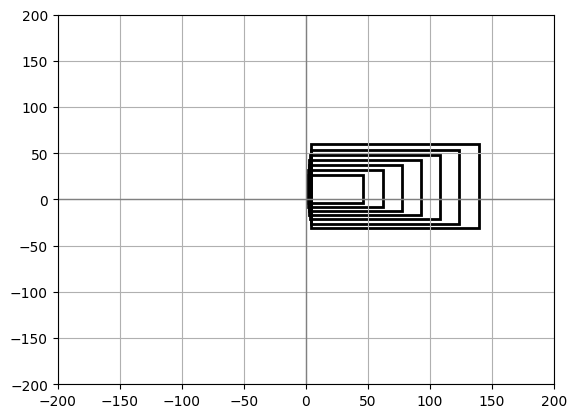

In [27]:
@tr_homothety(k_start=1.5, k_step=0.5, max_steps=7, anchor_y=10)
def gen_rectangle(start_x=1, start_y=1, width=30, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + width, start_y), (x + width, start_y + height), (x, start_y + height)]
        x += width + route

rectangles = itertools.islice(gen_rectangle(), 7)
vizualize(rectangles)

In [28]:
def to_symmetry(func):
    def wrapper(*args, **kwargs):
        for polygon in func(*args, **kwargs):
            symmetric = [(x,0.5 * y) for x, y in polygon]
            yield polygon
            yield symmetric
    return wrapper


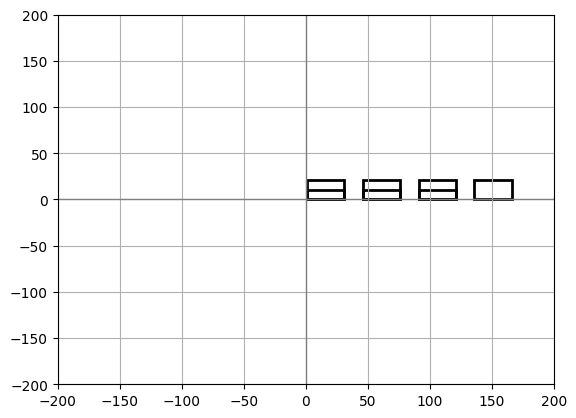

In [29]:
@to_symmetry
def gen_rectangle(start_x=1, start_y=1, width=30, height=20, route=15):
    x = start_x
    while True:
        yield [(x, start_y), (x + width, start_y), (x + width, start_y + height), (x, start_y + height)]
        x += width + route

rectangles = itertools.islice(gen_rectangle(), 7)
vizualize(rectangles)

In [30]:
def calc_perimeter(coordinates):
    coordinates = list(coordinates)
    perimeter = 0
    n = len(coordinates)
    for i in range(n):
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[(i + 1) % n]
        side_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        perimeter += side_length
    return perimeter
rectangles = itertools.islice(gen_rectangle(), 7)
total_perimeter = 0
for rect in rectangles:
    total_perimeter += calc_perimeter(rect)

print("Общий периметр:", total_perimeter)

Общий периметр: 640.0
